In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./data/all_data_csv.csv", parse_dates=['date_published'])

In [3]:
df.shape

(1728, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   URLS            1728 non-null   object        
 1   Headline        1728 non-null   object        
 2   Article         1728 non-null   object        
 3   date_published  1728 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 54.1+ KB


In [5]:
df.head()

,URLS,Headline,Article,date_published
0,/business/economy/opinion/news/averting-fiscal...,Averting fiscal crises in a deteriorating glob...,The war in Ukraine and aftershocks from the Co...,2022-10-08
1,/opinion/views/news/remembering-the-queens-leg...,"In remembering the 'Queen's legacy', why do we...",When news broke of the death of Queen Elizabet...,2022-10-08
2,/news/bangladesh/news/temple-idol-vandalised-j...,Temple idol vandalised in Jhenidah,Unidentified miscreants vandalised an idol of ...,2022-10-08
3,/news/bangladesh/crime-justice/news/attack-bcl...,"""Attack on BCL men"": 24 Chhatra Odhikar Parish...",A Dhaka court has sent 24 leaders and activist...,2022-10-08
4,/opinion/views/news/shanghai-cooperation-organ...,Shanghai Cooperation Organization Summit 2022:...,The Shanghai Cooperation Organization's (SCO) ...,2022-10-08


In [6]:
df['article_length'] = df['Article'].str.len()

In [7]:
df['article_length'].describe()

count     1728.000000
mean      2405.263310
std       2878.619004
min        169.000000
25%       1044.000000
50%       1745.000000
75%       3067.000000
max      79294.000000
Name: article_length, dtype: float64

<AxesSubplot: >

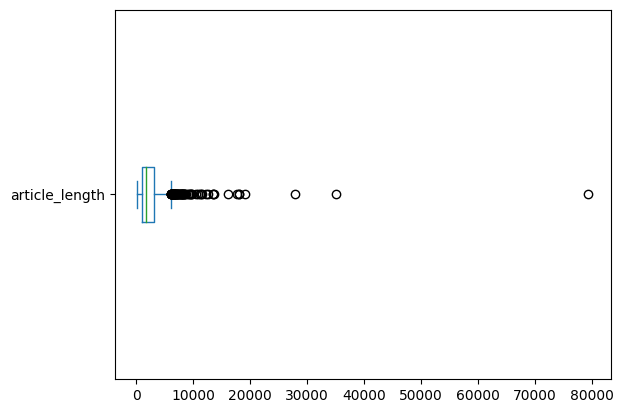

In [8]:
df['article_length'].plot(kind='box', vert=False)

## Simple Text Processing Pipeline

#### Tokenization

In [10]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*',text)

#### Treating stop words

In [13]:
import nltk
stopwords = set(nltk.corpus.stopwords.words('english'))

def remove_stop(tokens):
    return [
        t
        for t in tokens
        if t.lower() not in stopwords
    ]


#### Defining the pipeline

In [14]:
pipeline = [str.lower, tokenize, remove_stop]


def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [15]:
df['headline_tokens'] = df['Headline'].apply(prepare,pipeline=pipeline)

In [18]:
df['article_tokens'] = df['Article'].apply(prepare,pipeline=pipeline)

In [19]:
df['article_tokens'][0]

['war',
 'ukraine',
 'aftershocks',
 'covid-19',
 'pandemic',
 'present',
 'emerging',
 'market',
 'developing',
 'economies',
 'emdes',
 'extremely',
 'challenging',
 'external',
 'environment',
 'shaped',
 'higher',
 'food',
 'fertilizer',
 'energy',
 'prices',
 'rising',
 'inflation',
 'interest',
 'rates',
 'stagflation',
 'risks',
 'advanced',
 'economies',
 'fifteen',
 'years',
 'ago',
 'spikes',
 'food',
 'prices',
 'followed',
 'global',
 'financial',
 'crisis',
 'increases',
 'oil',
 'prices',
 'sequential',
 'governments',
 'addressed',
 'crisis',
 'separately',
 'occurred',
 'today',
 'crises',
 'happening',
 'fiscal',
 'policy',
 'key',
 'instruments',
 'governments',
 'mitigate',
 'impact',
 'shocks',
 'households',
 'businesses',
 'monetary',
 'policy',
 'must',
 'focus',
 'price',
 'stability',
 'unfortunately',
 'many',
 'countries',
 'depleted',
 'fiscal',
 'space',
 'following',
 'covid-19',
 'crisis',
 'options',
 'strengthen',
 'fiscal',
 'space',
 'include',
 'real

## Word Frequency Analysis

In [21]:
from collections import Counter

In [22]:
df.columns

Index(['URLS', 'Headline', 'Article', 'date_published', 'article_length',
       'headline_tokens', 'article_tokens'],
      dtype='object')

In [28]:
def count_words(df, column='headline_tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [29]:
freq_df = count_words(df)

In [31]:
freq_df.head(20)

,freq
token,
bangladesh,71
world,49
dhaka,47
us,39
india,38
profit,37
death,35
new,34
bank,32


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

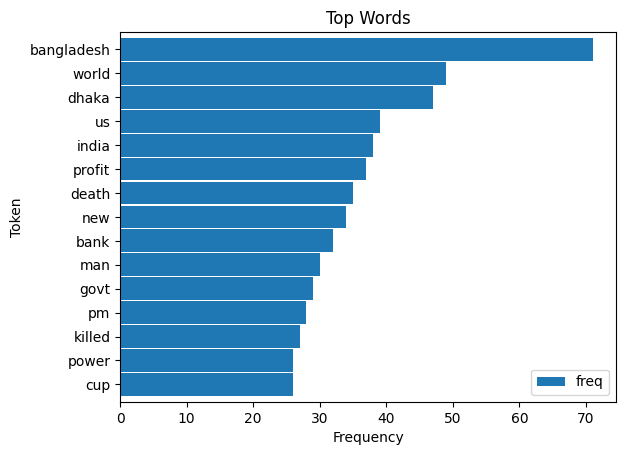

In [32]:
# creating frequency diagram
ax = freq_df.head(15).plot(kind='barh', width=0.95)
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')